# Access GW data with ODA_API

In [ ]:
# oda_api should be installed with GW support
%pip install oda_api[gw]

In [1]:
from oda_api.api import DispatcherAPI
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
dispatcher_url = 'https://www.astro.unige.ch/mmoda/dispatch-data'
disp=DispatcherAPI(url=dispatcher_url, instrument='mock')

## Query events in the time range (catalog and skymap)

In [3]:
par_dict={
    "T1": "2019-07-27T06:03:29.000",
    "T2": "2019-08-27T06:03:44.000",
    "contour_levels": "50,90",
    "do_cone_search": "false",
    "instrument": "gw",
    "product": "gw_skymap_image",
    "product_type": "Real",
}

data_collection = disp.get_product(**par_dict)

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


In [4]:
data_collection.show()

ID=0 prod_name=dispatcher_catalog_0  meta_data: 

ID=1 prod_name=skymap_GW190727_060333_1  meta_data: {}

ID=2 prod_name=skymap_GW190728_064510_2  meta_data: {}

ID=3 prod_name=skymap_GW190731_140936_3  meta_data: {}

ID=4 prod_name=skymap_GW190803_022701_4  meta_data: {}

ID=5 prod_name=skymap_GW190814_5  meta_data: {}

ID=6 prod_name=gw_skymap_image_6  meta_data: 



### Event catalog

In [5]:
data_collection.dispatcher_catalog_0.table

index,commonName,GPS,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper
int64,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,GW190727_060333,1248242632.0,3300.0,-1500.0,1540.0,38.0,-6.2,9.5,29.4,-8.4,7.1
1,GW190728_064510,1248331528.5,870.0,-370.0,260.0,12.3,-2.2,7.2,8.1,-2.6,1.7
2,GW190731_140936,1248617394.6,3300.0,-1720.0,2390.0,41.5,-9.0,12.2,28.8,-9.5,9.7
3,GW190803_022701,1248834439.9,3270.0,-1580.0,1950.0,37.3,-7.0,10.6,27.3,-8.2,7.8
4,GW190814,1249852257.0,240.0,-50.0,40.0,23.2,-1.0,1.1,2.59,-0.09,0.08


In [6]:
data_collection.dispatcher_catalog_0.table.meta

{'data': 'GW in time interval',
 't1': 1248242627,
 't2': 1250921042,
 'FRAME': None,
 'COORD_UNIT': None,
 'LON_NAME': None,
 'LAT_NAME': None}

### Skymaps

In [7]:
skmap = data_collection.skymap_GW190727_060333_1
skmap.show()

------------------------------
name: skymap_GW190727_060333
meta_data dict_keys([])
number of data units 1
------------------------------
data uniti 0 ,name: 


Skymaps are encoded in Healpix MOC format

In [8]:
skmap_data_unit = skmap.get_data_unit(0)
skmap_data_unit.header

{'BITPIX': 8,
 'COORDSYS': 'C',
 'CREATOR': 'ligo-skymap-from-samples',
 'DATE': '2021-01-26T20:10:21.896462',
 'DATE-OBS': '2019-07-27T06:03:34.000000',
 'DISTMEAN': 3300.149492134,
 'DISTSTD': 916.3541042391864,
 'GCOUNT': 1,
 'HISTORY': 'or_samples /local/condor/execute/dir_24620/tmp74es3tsj.h5',
 'INDXSCHM': 'EXPLICIT',
 'MJD-OBS': 58691.25247685185,
 'MOCORDER': 9,
 'NAXIS': 2,
 'NAXIS1': 40,
 'NAXIS2': 16896,
 'ORDERING': 'NUNIQ',
 'ORIGIN': 'LIGO/Virgo',
 'PCOUNT': 0,
 'PIXTYPE': 'HEALPIX',
 'TFIELDS': 5,
 'TFORM1': 'K',
 'TFORM2': 'D',
 'TFORM3': 'D',
 'TFORM4': 'D',
 'TFORM5': 'D',
 'TTYPE1': 'UNIQ',
 'TTYPE2': 'PROBDENSITY',
 'TTYPE3': 'DISTMU',
 'TTYPE4': 'DISTSIGMA',
 'TTYPE5': 'DISTNORM',
 'TUNIT2': 'sr-1',
 'TUNIT3': 'Mpc',
 'TUNIT4': 'Mpc',
 'TUNIT5': 'Mpc-2',
 'VCSVERS': 'ligo.skymap 0.5.0',
 'XTENSION': 'BINTABLE'}

and can be saved as fits

In [9]:
skmap.write_fits_file('skymap_GW190727_060333.fits')

### Contours

In [10]:
cont = data_collection.gw_skymap_image_6

Plot contours for all events

In [11]:
from oda_api.plot_tools import OdaGWContours

In [12]:
oda_cont = OdaGWContours(cont)

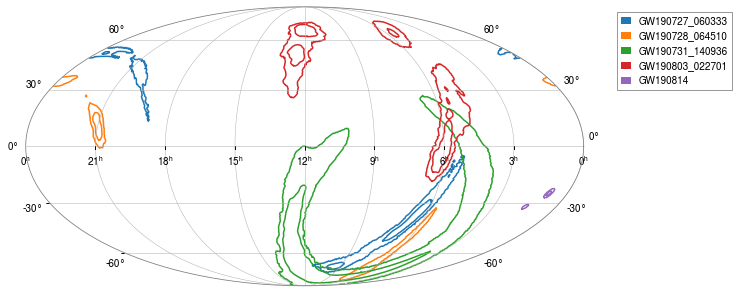

In [13]:
_ = oda_cont.show()

or for single event

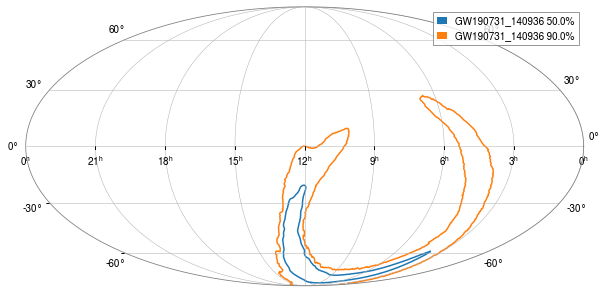

In [14]:
_ = oda_cont.show('GW190731_140936')

## Spectrogram for the time range

In [15]:
par_dict={
    "T1": "2017-08-17T12:40:54",
    "T2": "2017-08-17T12:41:10",
    "T_format": "isot",
    "detector": "H1",
    "instrument": "gw",
    "product": "gw_spectrogram",
    "qmax": 64,
    "qmin": 4,
    "product_type": "Real",
    "whiten": True
}

data_collection = disp.get_product(**par_dict)


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
/home/dsavchenko/Projects/cloud/dispatcher-container/oda_api/oda_api/api.py:932: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'detector', 'whiten', 'qmin', 'qmax']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)


In [16]:
data_collection.show()

ID=0 prod_name=Spectrogram_0  meta_data: 



In [17]:
sgram = data_collection.Spectrogram_0

produces Spectrogram object of gwpy library

In [18]:
print(sgram)

Spectrogram([[1.45331742e-02, 1.45331742e-02, 1.81692112e-02,
              ..., 2.41175323e-04, 2.73469894e-04,
              2.73469894e-04],
             [1.63602121e-02, 1.63602121e-02, 2.03857105e-02,
              ..., 8.98046201e-05, 5.88277908e-05,
              5.88277908e-05],
             [1.72100142e-02, 1.72100142e-02, 2.16290895e-02,
              ..., 3.00785730e-04, 2.87213072e-04,
              2.87213072e-04],
             ...,
             [1.61051437e-01, 1.61051437e-01, 1.73868716e-01,
              ..., 5.05741846e-05, 1.13808557e-04,
              1.13808557e-04],
             [2.14594558e-01, 2.14594558e-01, 2.33802274e-01,
              ..., 1.66363490e-04, 2.15521693e-04,
              2.15521693e-04],
             [2.79544115e-01, 2.79544115e-01, 3.06449860e-01,
              ..., 2.13164400e-04, 2.63086869e-04,
              2.63086869e-04]]
            unit: s,
            name: Spectrogram,
            epoch: 1187008872.0,
            channel: None,
      

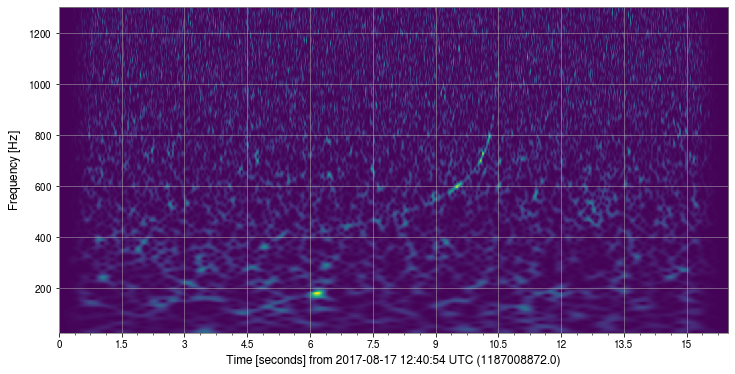

In [19]:
_ = sgram.plot()

## Strain time series

In [20]:
par_dict={
    "T1": "2017-08-17T12:41:02",
    "T2": "2017-08-17T12:41:06",
    "T_format": "isot",
    "detector": "H1",
    "instrument": "gw",
    "product": "gw_strain",
    "fmax": 400,
    "fmin": 30,
    "product_type": "Real",
    "whiten": True
}

data_collection = disp.get_product(**par_dict)

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
/home/dsavchenko/Projects/cloud/dispatcher-container/oda_api/oda_api/api.py:932: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'detector', 'whiten', 'fmin', 'fmax']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)


Produces both original and whitened-bandpassed strain time series

In [21]:
data_collection.show()

ID=0 prod_name=Strain_0  meta_data: 

ID=1 prod_name=Strain_bp_1  meta_data: 



In [22]:
bp_strain = data_collection.Strain_bp_1

In [23]:
print(bp_strain)

TimeSeries([-0.01020188,  0.02356718,  0.05186042, ...,
             0.03916119,  0.02171726, -0.00103156]
           unit: dimensionless,
           t0: 1187008880.0 s,
           dt: 0.000244140625 s,
           name: Strain_bp,
           channel: None)


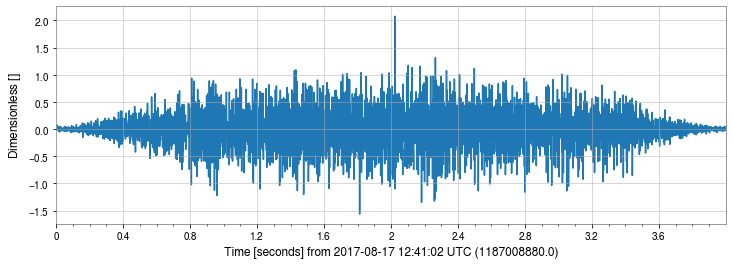

In [24]:
_ = bp_strain.plot()